# Transformation to DT-compliant dataset
---
This notebook is thought to transform the tables got by the experimental simulation to table with a format compliant with the DT.

The notebook is not well structured and used when needed, everything is rather a

In [2]:
import pandas as pd
import numpy as np
from online_learning.utils import plotting_utils

In [4]:
df_ground = pd.read_csv("../data/output/driven/ground_faulty_temperature/2024_11_06-15_09_54/dataset_0.csv", index_col=0)

In [5]:
df_ground

,soc,soh,c_max,voltage,current,power,v_oc,r0,r1,c,v_r0,v_rc,i_r1,i_c,temperature,heat,calendar_aging,cyclic_aging,degradation,aging_iteration
time,,,,,,,,,,,,,,,,,,,,
-1.0,0.860000,1.000000,20.000000,4.150000,0.0000,0.000000,0.000000,0.002901,0.003674,35813.349856,0.000000,0.000000,0.000000,0.000000,298.150000,0.000000,0.000000e+00,0.000000,0.000000,0
0.0,0.860000,1.000000,20.000000,4.005474,0.0000,-0.000000,4.005474,0.002901,0.003674,35813.349856,0.000000,0.000000,0.000000,0.000000,298.150000,0.000000,-6.020051e-10,0.000000,0.000000,0
1.0,0.860084,1.000000,20.000000,4.023267,-6.0750,24.441348,4.005474,0.002901,0.003674,35813.349856,-0.017625,-0.000168,-0.045825,-6.029175,298.150561,0.107078,-6.020051e-10,0.000000,0.000000,0
2.0,0.860169,1.000000,20.000000,4.023515,-6.0750,24.442851,4.005555,0.002901,0.003673,35814.196061,-0.017624,-0.000335,-0.091310,-5.983690,298.151121,0.107099,-6.020051e-10,0.000000,0.000000,0
3.0,0.860251,1.000000,20.000000,4.023213,-5.8880,23.688678,4.005635,0.002901,0.003673,35815.041937,-0.017082,-0.000496,-0.135046,-5.752954,298.151656,0.100644,-6.020051e-10,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548947.0,0.542319,0.966612,19.332232,3.578387,11.2285,-40.179914,3.696154,0.004999,0.005242,23374.692031,0.056131,0.061637,11.757667,-0.529167,278.150000,1.354966,4.524825e-04,0.002855,0.022074,2490000
2548948.0,0.542157,0.966612,19.332232,3.578409,11.2285,-40.180166,3.696154,0.004999,0.005242,23374.692031,0.056131,0.061614,11.753384,-0.524884,278.150000,1.354438,4.524825e-04,0.002855,0.022074,2490000
2548949.0,0.541996,0.966612,19.332232,3.578431,11.2285,-40.180416,3.696154,0.004999,0.005242,23374.692031,0.056131,0.061592,11.749135,-0.520635,278.150000,1.353914,4.524825e-04,0.002855,0.022074,2490000


### Lookup tables

In [53]:
df_r1 = pd.read_csv("../data/external/r1_final_table.csv", index_col=0)

In [54]:
df_r1

,Soc,r1,Temp
0,0.1,0.016667,10
1,0.0,0.019115,10
2,0.1,0.016862,10
3,0.0,0.017721,10
4,0.1,0.017957,10
...,...,...,...
154,0.6,0.002847,40
155,0.5,0.001973,40
156,0.4,0.002715,40
157,0.3,0.001947,40


In [55]:
df_ocv = pd.read_csv("../data/external/ocv_lookup_table.csv")

In [56]:
df_ocv

,Soc,Temp,OCV
0,10,10,3.521
1,0,10,3.486
2,10,10,3.521
3,0,10,3.488
4,10,10,3.521
...,...,...,...
457,60,40,3.764
458,50,40,3.706
459,40,40,3.670
460,30,40,3.637


In [69]:
means = []
for temp in set(df_r1['Temp'].values):
    for soc in set(df_r1['Soc'].values):
        means.append({
            "pair": [soc, temp],
            "val": df_r1[(df_r1['Temp'] == temp) & (df_r1['Soc'] == soc)]['r1'].values
        })

In [70]:
means

[{'pair': [0.1, 40],
  'val': array([0.00348108, 0.00341424, 0.00290325, 0.00314792, 0.00228571,
         0.0032458 ])},
 {'pair': [0.0, 40], 'val': array([], dtype=float64)},
 {'pair': [0.6, 40],
  'val': array([0.00268229, 0.00257469, 0.00275554, 0.00217926, 0.00279285,
         0.00280434, 0.00255965, 0.00244392, 0.00264663, 0.00174196,
         0.00284711])},
 {'pair': [0.5, 40],
  'val': array([0.00268712, 0.00226783, 0.00268228, 0.00290883, 0.00280777,
         0.00244639, 0.00314454, 0.00320789, 0.00230505, 0.00263606,
         0.00272209, 0.00233718, 0.00300006, 0.00247952, 0.00225007,
         0.00309668, 0.00309892, 0.00313156, 0.00326462, 0.00314145,
         0.00204242, 0.00275713, 0.00296911, 0.00304872, 0.0020395 ,
         0.00295193, 0.00197277])},
 {'pair': [0.9, 40],
  'val': array([0.00316795, 0.0024539 , 0.00253158, 0.0023549 , 0.00198634,
         0.00252749])},
 {'pair': [0.4, 40],
  'val': array([0.00265669, 0.00270228, 0.00257718, 0.00248963, 0.00268212,
       

In [2]:
df0 = pd.read_csv("../data/external/Detail_C1_5_0Gradi.csv", skiprows=3)

In [3]:
df0

,Description,Step,Cycle,Loop,TEST TIME,DWell Time(ms),Voltage(V),Current(A),Capacity(Ah),Total Capacity(Ah),Power(W),KWh,T20a
0,carica,1,1,1,2023/11/30 11:26:07,10,4.1507,1.6718,0.0000,0.0000,6.939180,0.000000,-3.0474
1,carica,1,1,1,2023/11/30 11:26:08,1010,4.1500,1.0860,0.0003,0.0003,4.507006,0.000001,-3.0030
2,carica,1,1,1,2023/11/30 11:26:09,2010,4.1499,1.0452,0.0006,0.0006,4.337609,0.000003,-3.0358
3,carica,1,1,1,2023/11/30 11:26:10,3010,4.1500,1.0497,0.0009,0.0009,4.356466,0.000004,-2.9872
4,carica,1,1,1,2023/11/30 11:26:11,4010,4.1499,1.0421,0.0012,0.0012,4.324527,0.000005,-2.9950
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31280,carica,23,1,1,2023/11/30 20:07:03,31255810,4.1500,0.2872,16.6182,0.0709,1.191769,0.064840,20.7030
31281,carica,23,1,1,2023/11/30 20:07:04,31256810,4.1498,0.2667,16.6183,0.0710,1.106602,0.064840,20.6986
31282,carica,23,1,1,2023/11/30 20:07:05,31257810,4.1500,0.2782,16.6184,0.0710,1.154349,0.064840,20.7124
31283,carica,23,1,1,2023/11/30 20:07:06,31258810,4.1499,0.3045,16.6185,0.0711,1.263778,0.064841,20.7770


In [4]:
names = {'TEST TIME': 'Time', 'T20a': 'Temperature'}
df0 = df0.rename(mapper=names, axis=1)

In [5]:
to_drop = ['Description', 'Step', 'Cycle', 'Loop']
df = df0.drop(to_drop, axis=1)

In [6]:
df

,Time,DWell Time(ms),Voltage(V),Current(A),Capacity(Ah),Total Capacity(Ah),Power(W),KWh,Temperature
0,2023/11/30 11:26:07,10,4.1507,1.6718,0.0000,0.0000,6.939180,0.000000,-3.0474
1,2023/11/30 11:26:08,1010,4.1500,1.0860,0.0003,0.0003,4.507006,0.000001,-3.0030
2,2023/11/30 11:26:09,2010,4.1499,1.0452,0.0006,0.0006,4.337609,0.000003,-3.0358
3,2023/11/30 11:26:10,3010,4.1500,1.0497,0.0009,0.0009,4.356466,0.000004,-2.9872
4,2023/11/30 11:26:11,4010,4.1499,1.0421,0.0012,0.0012,4.324527,0.000005,-2.9950
...,...,...,...,...,...,...,...,...,...
31280,2023/11/30 20:07:03,31255810,4.1500,0.2872,16.6182,0.0709,1.191769,0.064840,20.7030
31281,2023/11/30 20:07:04,31256810,4.1498,0.2667,16.6183,0.0710,1.106602,0.064840,20.6986
31282,2023/11/30 20:07:05,31257810,4.1500,0.2782,16.6184,0.0710,1.154349,0.064840,20.7124
31283,2023/11/30 20:07:06,31258810,4.1499,0.3045,16.6185,0.0711,1.263778,0.064841,20.7770


In [7]:
#df.to_csv("ground_checkup0.csv", index=False)

In [9]:
csv_dict = {
    "0C" : ['ground_checkup0.csv', "../data/external/Detail_C1_5_0Gradi.csv"],
    "10C" : ['ground_checkup10.csv', "../data/external/Detail_C1_5_10Gradi.csv"],
    "20C" : ['ground_checkup20.csv', "../data/external/Detail_C1_5_20Gradi.csv"],
    "30C" : ['ground_checkup30.csv', "../data/external/Detail_C1_5_30Gradi.csv"],
    "40C" : ['ground_checkup40.csv', "../data/external/Detail_C1_5_40Gradi.csv"],
}

In [10]:
def get_simulator_csv_checkup(df: pd.DataFrame):
    names = {'TEST TIME': 'Time', 'T20a': 'Temperature'}
    df = df.rename(mapper=names, axis=1)
    to_drop = ['Description', 'Step', 'Cycle', 'Loop']
    df = df.drop(to_drop, axis=1)
    return df

In [11]:
for key in csv_dict.keys():
    df = pd.read_csv(csv_dict[key][1], skiprows=3)
    df = get_simulator_csv_checkup(df=df)
    df.to_csv(csv_dict[key][0], index=False)

<Axes: >

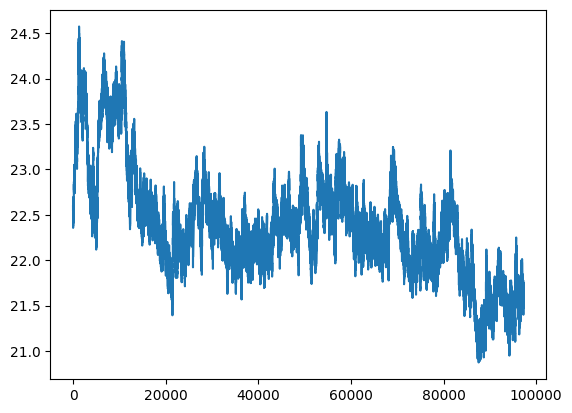

In [19]:
df['Temperature'].plot()

In [75]:
df_aging = pd.read_csv("../data/ground/aging_cycle2.csv")

In [76]:
df_aging

,Time,Voltage [V],Current [A],Temperature [degC]
0,10,3.7857,-20.0214,33.9093
1,1010,3.7765,-20.0086,34.0540
2,2010,3.7740,-20.0082,33.9949
3,3010,3.7718,-20.0084,34.0354
4,4010,3.7700,-20.0084,34.0710
...,...,...,...,...
1315393,1314392010,4.1499,0.2328,39.3198
1315394,1314393010,4.1499,0.2294,39.2720
1315395,1314394010,4.1499,0.2274,39.1849
1315396,1314395010,4.1499,0.2431,39.2500


In [77]:
df_aging['Time'] = (df_aging['Time'] - 10) / 1000

In [78]:
df_aging

,Time,Voltage [V],Current [A],Temperature [degC]
0,0.00,3.7857,-20.0214,33.9093
1,1.00,3.7765,-20.0086,34.0540
2,2.00,3.7740,-20.0082,33.9949
3,3.00,3.7718,-20.0084,34.0354
4,4.00,3.7700,-20.0084,34.0710
...,...,...,...,...
1315393,1314392.00,4.1499,0.2328,39.3198
1315394,1314393.00,4.1499,0.2294,39.2720
1315395,1314394.00,4.1499,0.2274,39.1849
1315396,1314395.00,4.1499,0.2431,39.2500


In [79]:
max(df_aging['Voltage [V]']), max(df_aging['Current [A]']), max(df_aging['Temperature [degC]'])

(4.15, 20.0879, 45.1261)

In [80]:
df_aging.to_csv("ground_aging_2.csv")

In [11]:
df.loc[df["Current(A)"] > 15, "Current(A)"] = df.loc[df["Current(A)"] > 15, "Current(A)"] / 1000

In [5]:
#df.to_csv("ground_silvia.csv", index=False)

In [6]:
df = pd.read_csv("../data/ground/ground_silvia_fixed.csv")

<Axes: >

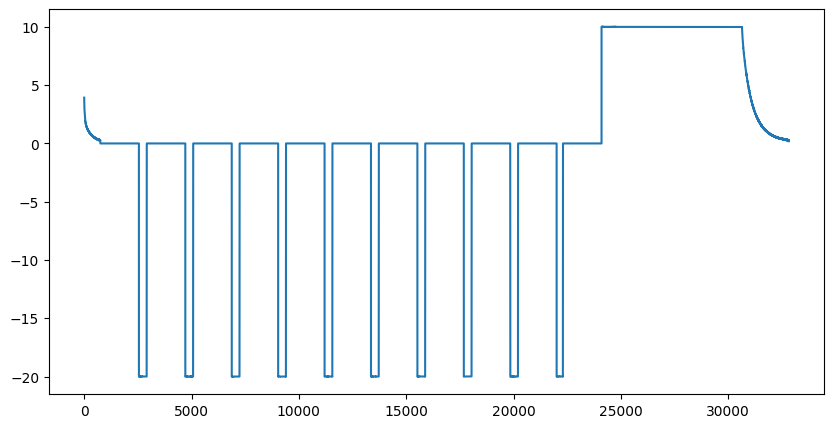

In [10]:
df.iloc[:]['Current(A)'].plot(figsize=(10,5))

<Axes: >

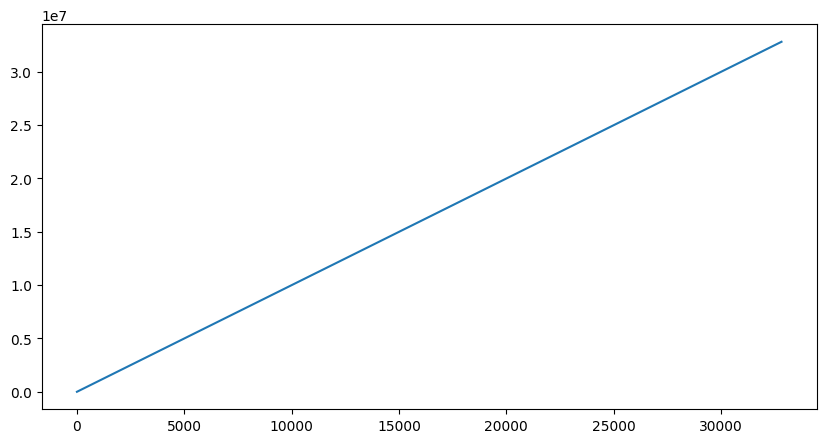

In [14]:
df['DWell Time(ms)'].plot(figsize=(10,5))

In [21]:
df_sim = pd.read_csv("../data/output/simulation/paper/2024_02_07-11_10/dataset.csv")

In [22]:
df_sim

,Time,soc,soh,voltage,current,power,Vocv,R0,R1,C,temperature,heat
0,0.0,1.000000,1.0,4.150000,0.0000,0.000000,0.000000,0.002790,0.002736,8193.693197,296.150000,0.000000
1,1.0,1.000000,1.0,4.148655,-3.7463,15.542105,4.137765,0.002790,0.002736,8193.693197,296.146774,0.039226
2,2.0,1.000000,1.0,4.148598,-3.5827,14.863183,4.137764,0.002790,0.002737,8192.350883,296.143535,0.036070
3,3.0,1.000000,1.0,4.148662,-3.4729,14.407888,4.137763,0.002790,0.002737,8191.003022,296.140289,0.034189
4,4.0,1.000000,1.0,4.148851,-3.4159,14.172059,4.137762,0.002791,0.002737,8189.652206,296.137041,0.033447
...,...,...,...,...,...,...,...,...,...,...,...,...
32790,34038.0,0.973596,1.0,4.109974,-0.2836,1.165589,4.108225,0.003017,0.003122,11338.923901,293.365891,0.000498
32791,34039.0,0.973600,1.0,4.109966,-0.2797,1.149557,4.108230,0.003017,0.003122,11338.182735,293.365652,0.000491
32792,34040.0,0.973604,1.0,4.109913,-0.2613,1.073920,4.108234,0.003017,0.003122,11337.450420,293.365413,0.000460
32793,34041.0,0.973608,1.0,4.109950,-0.2727,1.120783,4.108238,0.003017,0.003122,11336.759430,293.365175,0.000478


<Axes: >

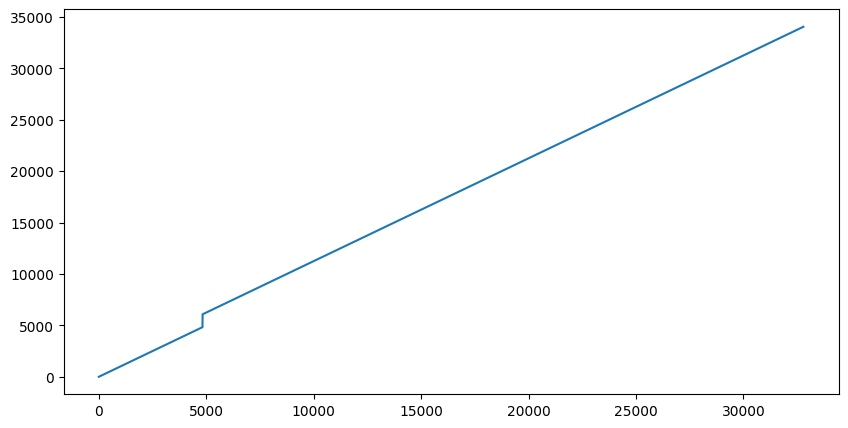

In [28]:
df_sim['Time'].plot(figsize=(10,5))